In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# 그래프 설정.
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# String Encoding.
from sklearn.preprocessing import LabelEncoder

# 다중분류를 위한 핫-윈 인코더.
from keras.utils import to_categorical

# 평가.
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

#### 이진 분류
- 출력층의 노드를 1로 설정.
- 출력층의 활성 함수는 sigmoid로 설정.
- compile 시 손실함수는 binary_crossentropy로 설정.

#### 다중 분류
- 결과 데이터를 핫-윈 인코더로 인코딩.
- 출력층의 노드는 결과 데이터의 종류수로 설정.
- 출력층의 활성화 함수는 softmax로 설정.
- compile시 손실함수는 categorical_crossentropy로 설정.

In [2]:
# Seed 값 설정.
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 데이터 읽기.
# 컬럼명 변경.
column_list = ['꽃받침길이', '꽃받침너비', '꽃잎길이', '꽃잎너비', '품종']
df = pd.read_csv('data/iris.csv', names=column_list)
df.head(10)

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# 데이터 정보 확인.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침길이   150 non-null    float64
 1   꽃받침너비   150 non-null    float64
 2   꽃잎길이    150 non-null    float64
 3   꽃잎너비    150 non-null    float64
 4   품종      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# 결측 확인.
df.isna().sum()

꽃받침길이    0
꽃받침너비    0
꽃잎길이     0
꽃잎너비     0
품종       0
dtype: int64

In [6]:
# 품종명 확인.
df['품종'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

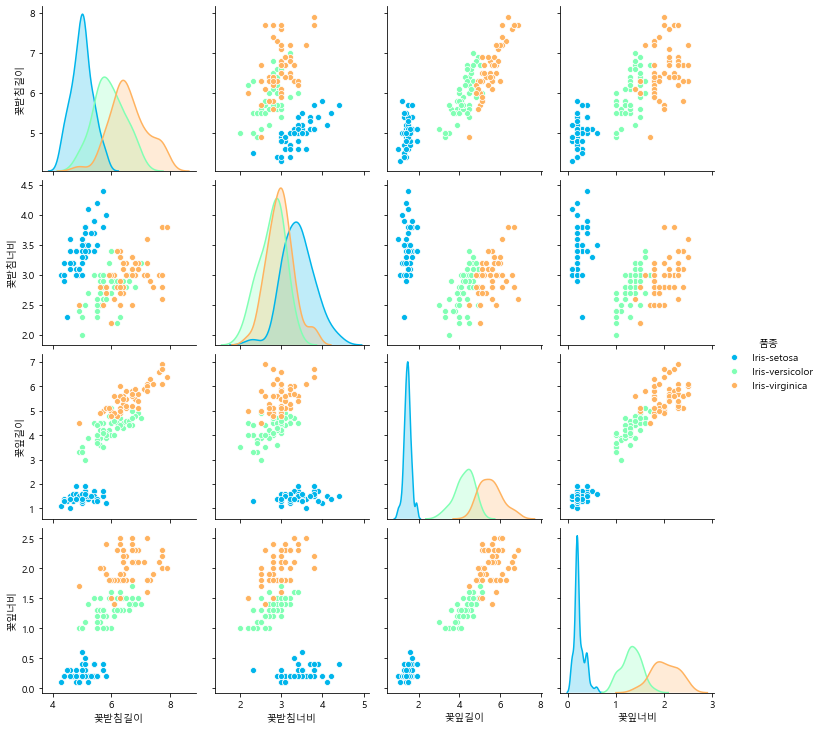

In [7]:
# Pairplot.
sb.pairplot(df, hue='품종', palette='rainbow')
plt.show()

In [8]:
# 입력과 결과로 분할.
# 전부 Train dataset으로 활용.
X = df.drop('품종', axis=1)
Y = df['품종']

In [9]:
# 문자열 인코딩.
encoder1 = LabelEncoder()
encoder1.fit(Y)
Y2 = encoder1.transform(Y)

# 핫-윈 인코딩.
y_encoded = to_categorical(Y2)

In [10]:
# 모델 설정.
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))

# 다중 분류의 출력층의 노드 개수는 결과데이터 종류의 개수와 동일하게 설정해야함.
# 다중 분류를 보는 활성화 함수로 softmax를 사용.
model.add(Dense(3, activation='softmax'))

# 모델 컴파일.
# 다중 분류일 경우 손실함수는 categorical_crossentropy를 사용.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습.
model.fit(X, y_encoded, epochs=50, batch_size=10)

Epoch 1/50
15/15 [==============================] - 1s 2ms/step - loss: 1.9490 - accuracy: 0.3300
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 1.6882 - accuracy: 0.3257
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 1.3729 - accuracy: 0.3218
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 1.2700 - accuracy: 0.2559
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 1.0555 - accuracy: 0.3518
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 1.0022 - accuracy: 0.3194
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.9510 - accuracy: 0.2738
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: 0.8996 - accuracy: 0.5940
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 0.8387 - accuracy: 0.6809
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 0.8077 - accuracy: 0.6720
Epoch 11/50
15/15 [

In [11]:
# 예측 정확도.
# 주어진 입력데이터를 통해 예측 결과를 도출하고 설정한 결과 데이터와 비교해서 얼마나 일치하는지 확인.
print(f'정확도 : {model.evaluate(X, y_encoded)[1]}')

5/5 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.9733
정확도 : 0.9733333587646484


In [12]:
# 예측값 추출.
pred = np.argmax(model.predict(X), axis=-1)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
# 예측 결과 디코딩 작업.
y_pred = encoder1.inverse_transform(pred)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [14]:
# 평가.
# Train data를 통한 예측은 당연히 잘되야 하는 매우 당연한 결과를 보임.
score = accuracy_score(Y, y_pred)
print(f'Score : {round(score, 3)*100}%')

Score : 97.3%
